In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('photosynthesis.csv')
df = df.sort_values(by='Label', ascending=True)
df.dropna(inplace=True)
df

,Chlorophyll,Fv/Fm,Y(II),ETR,qP,qN,Y(NO),Y(NPQ),Condition,Label
0,49.90,0.790,0.580,22.0,0.80,0.35,0.300,0.120,Healthy,0
1,50.37,0.766,0.560,21.1,0.81,0.40,0.300,0.145,Healthy,0
2,44.93,0.772,0.580,22.0,0.83,0.36,0.290,0.125,Healthy,0
3,49.57,0.771,0.560,19.7,0.75,0.44,0.310,0.150,Healthy,0
4,38.40,0.742,0.550,20.1,0.85,0.51,0.270,0.200,Healthy,0
5,49.10,0.818,0.573,21.7,0.75,0.39,0.300,0.126,Healthy,0
6,46.60,0.796,0.580,21.8,0.78,0.35,0.300,0.125,Healthy,0
7,41.00,0.803,0.565,21.2,0.77,0.39,0.295,0.140,Healthy,0
15,47.40,0.804,0.586,22.2,0.79,0.36,0.280,0.130,Uninfected,1
14,42.13,0.740,0.550,20.6,0.82,0.39,0.310,0.145,Uninfected,1


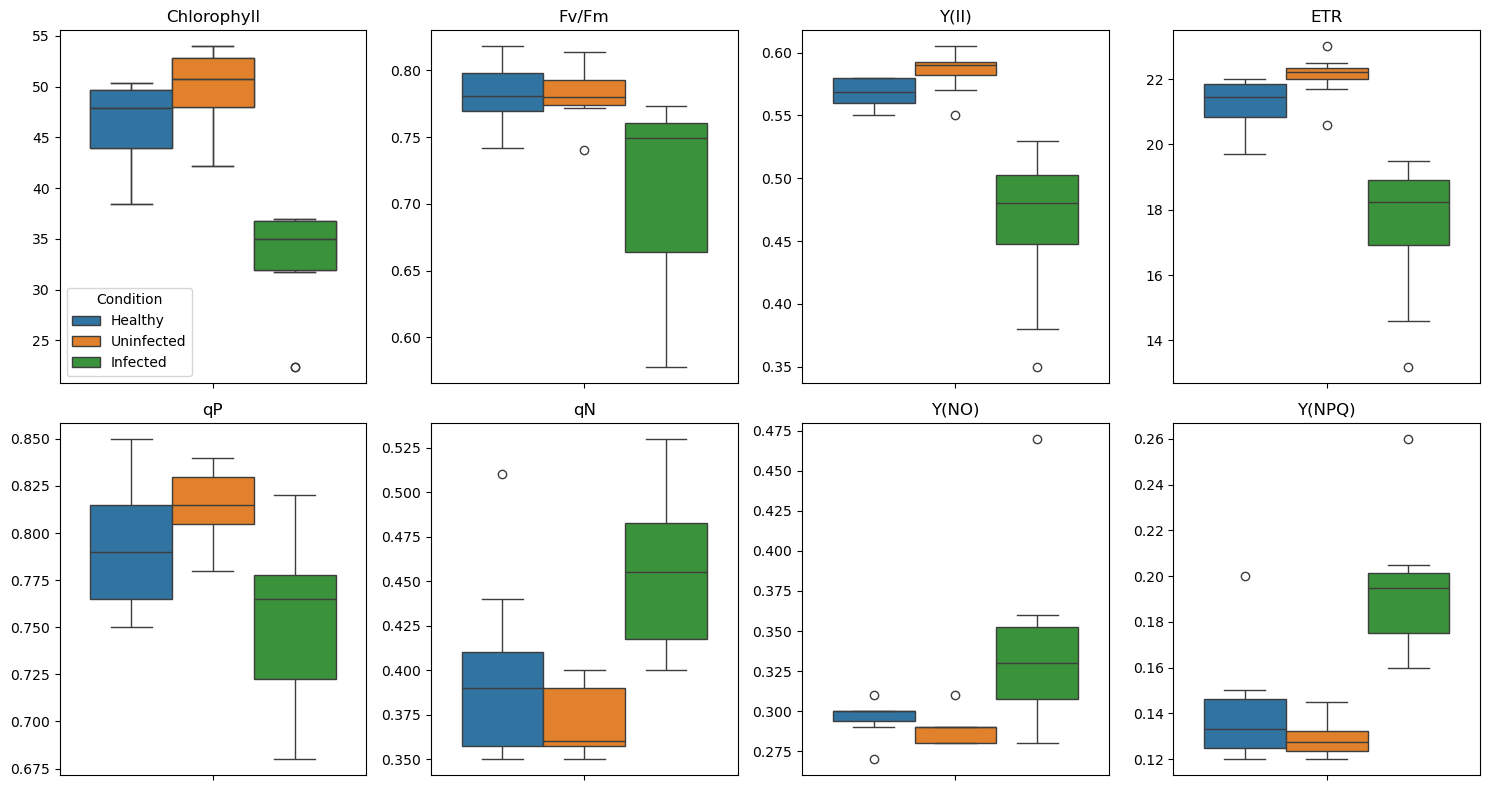

In [7]:
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
axes = ax.ravel()

for i in range(8):
    sns.boxplot(data=df, y=df.iloc[:, i],
                hue='Condition', fill=True, ax=axes[i], legend=False)
    axes[i].set_title(df.columns[i])
    axes[i].set_ylabel('')  

sns.boxplot(data=df, y=df.iloc[:, 0], hue='Condition', fill=True, ax=axes[0], legend=True)
axes[0].set_ylabel('')

plt.tight_layout()

plt.show()

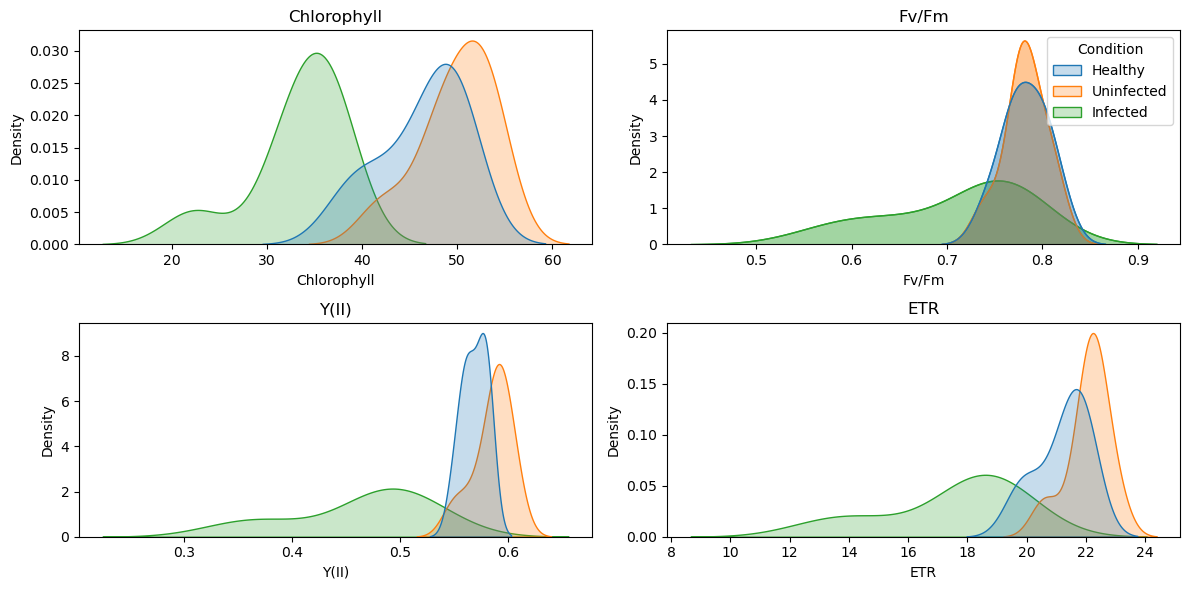

In [152]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
axes = ax.ravel()

for i in range(4):
    sns.kdeplot(df, x=df.columns[i], hue='Condition', fill=True, ax=axes[i], legend=False)
    axes[i].set_title(df.columns[i])  

sns.kdeplot(df, x=df.columns[1], hue='Condition', fill=True, ax=axes[1], legend=True)

plt.tight_layout()

plt.show()

In [113]:
df_mean = df.groupby('Condition').mean()
df_mean = df_mean.sort_values(by='Label', ascending=True)
df_mean

,Chlorophyll,Fv/Fm,Y(II),ETR,qP,qN,Y(NO),Y(NPQ),Label
Condition,,,,,,,,,
Healthy,46.23375,0.78225,0.568500,21.200,0.79250,0.39875,0.295625,0.141375,0.0
Uninfected,49.86625,0.78175,0.585125,22.075,0.81375,0.37000,0.288750,0.129375,1.0
Infected,33.33000,0.70925,0.462500,17.450,0.75375,0.45750,0.341250,0.194375,2.0


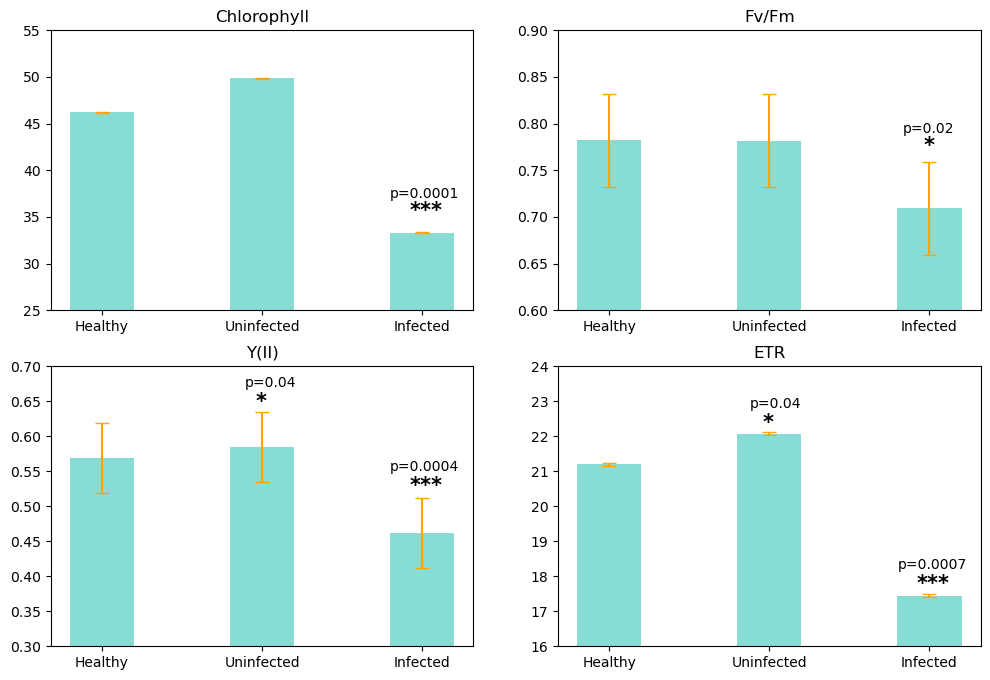

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=False)
ax = axes.ravel()

for i in range(4):
    ax[i].bar(df_mean.index, df_mean.iloc[:, i], color='#39C5BB', alpha=0.6,
                width=0.4, yerr=0.05, ecolor='orange', capsize=5)
    ax[i].set_title(df.columns[i])


ax[0].set_ylim(25, 55)

ax[0].text(1.92, 35, '***', fontsize=15, fontweight='bold')
ax[0].text(1.8, 37, 'p=0.0001', fontsize=10)


ax[1].set_ylim(0.6, 0.9)

ax[1].text(1.96, 0.77, '*', fontsize=15, fontweight='bold')
ax[1].text(1.83, 0.79, 'p=0.02', fontsize=10)


ax[2].set_ylim(0.3, 0.7)

ax[2].text(0.96, 0.64, '*', fontsize=15, fontweight='bold')
ax[2].text(0.89, 0.67, 'p=0.04', fontsize=10)

ax[2].text(1.92, 0.52, '***', fontsize=15, fontweight='bold')
ax[2].text(1.8, 0.55, 'p=0.0004', fontsize=10)


ax[3].set_ylim(16, 24)

ax[3].text(0.96, 22.2, '*', fontsize=15, fontweight='bold')
ax[3].text(0.88, 22.8, 'p=0.04', fontsize=10)

ax[3].text(1.92, 17.6, '***', fontsize=15, fontweight='bold')
ax[3].text(1.8, 18.2, 'p=0.0007', fontsize=10)

plt.show()

In [171]:
# t检验
from scipy.stats import ttest_ind

for col in df.columns[:-2]:
    print(f'{col}:')
    _, p_value_1 = ttest_ind(df[df['Label'] == 0][col], df[df['Label'] == 1][col])
    _, p_value_2 = ttest_ind(df[df['Label'] == 0][col], df[df['Label'] == 2][col])
    print(f'p1 = {p_value_1:.4f}')
    print(f'p2 = {p_value_2:.4f}')

Chlorophyll:
p1 = 0.1059
p2 = 0.0001
Fv/Fm:
p1 = 0.9663
p2 = 0.0191
Y(II):
p1 = 0.0413
p2 = 0.0004
ETR:
p1 = 0.0444
p2 = 0.0007
qP:
p1 = 0.1742
p2 = 0.0899
qN:
p1 = 0.1804
p2 = 0.0380
Y(NO):
p1 = 0.2272
p2 = 0.0473
Y(NPQ):
p1 = 0.2389
p2 = 0.0026


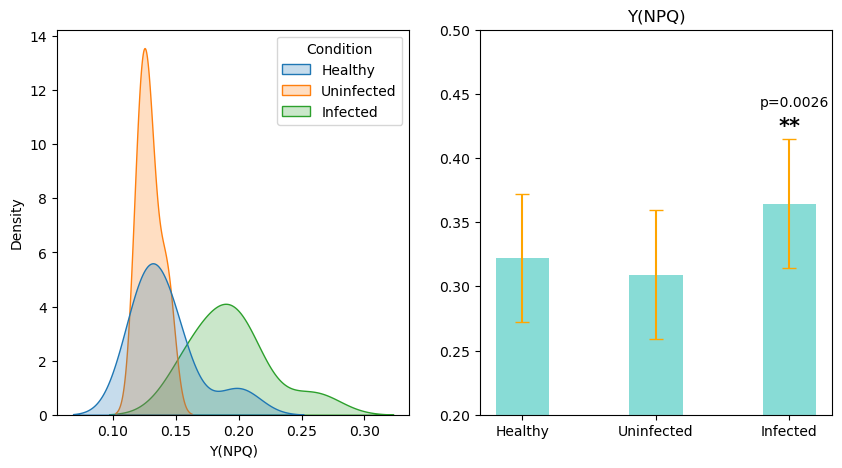

In [185]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.kdeplot(df, x=df['Y(NPQ)'], hue='Condition', fill=True, ax=ax1)

ax2.bar(df_mean.index, df_mean.iloc[:, -1], color='#39C5BB', alpha=0.6,
                width=0.4, yerr=0.05, ecolor='orange', capsize=5)

ax2.set_title('Y(NPQ)')
ax2.set_ylim(0.2, 0.5)
ax2.text(1.92, 0.42, '**', fontsize=15, fontweight='bold')
ax2.text(1.78, 0.44, 'p=0.0026', fontsize=10)

plt.show()

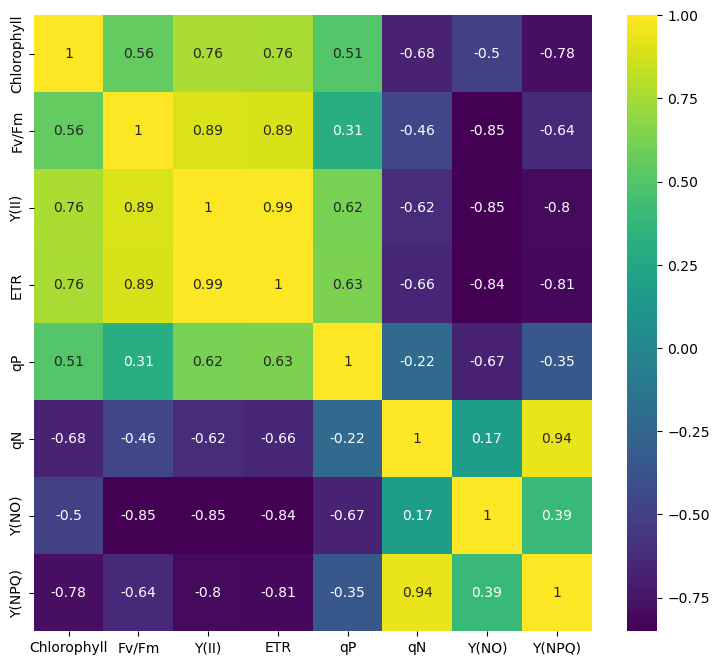

In [164]:
plt.figure(figsize=(9, 8))

corr = df.iloc[:, :-2].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

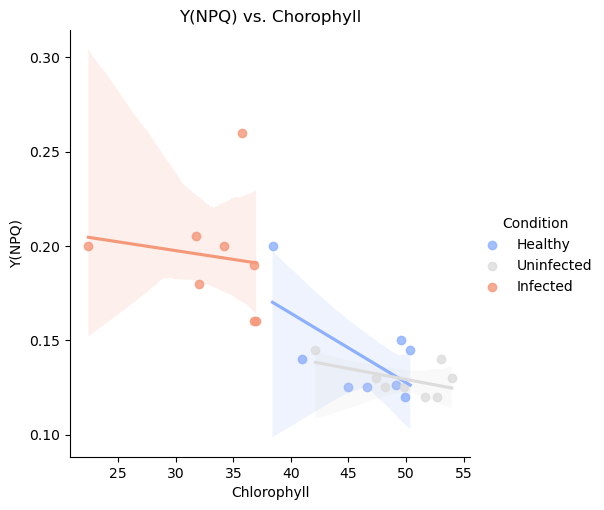

In [181]:
sns.lmplot(data=df, x='Chlorophyll', y='Y(NPQ)', hue='Condition', palette='coolwarm')
plt.title('Y(NPQ) vs. Chorophyll')
plt.show()

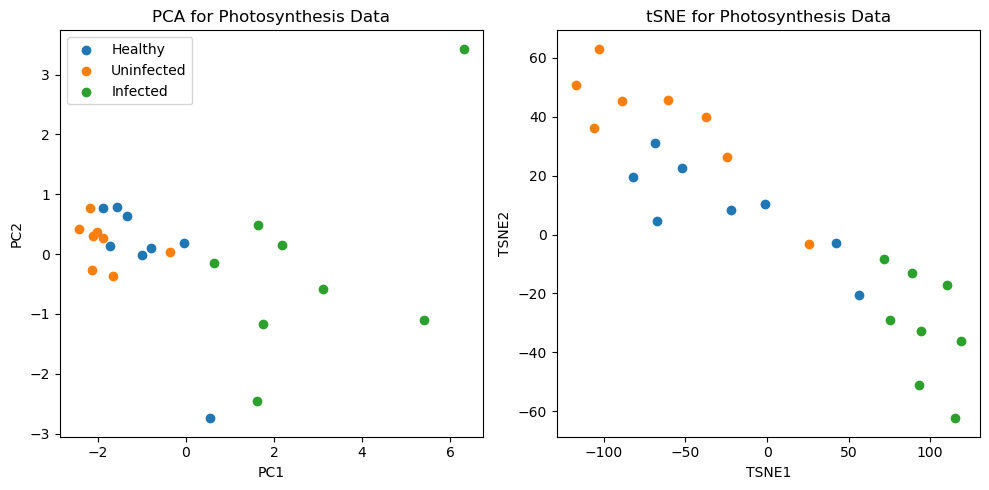

In [60]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-2]
y = df['Label']

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Healthy')
ax1.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Uninfected')
ax1.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], label='Infected')

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend()
ax1.set_title('PCA for Photosynthesis Data', fontdict={'fontsize': 12})

# tSNE降维
tsne = TSNE(n_components=2, perplexity=8)
X_tsne = tsne.fit_transform(X)

# 绘制散点图
ax2.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], label='Healthy')
ax2.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], label='Uninfected')
ax2.scatter(X_tsne[y == 2, 0], X_tsne[y == 2, 1], label='Infected')

ax2.set_xlabel('TSNE1') 
ax2.set_ylabel('TSNE2')
ax2.set_title('tSNE for Photosynthesis Data', fontdict={'fontsize': 12})

plt.tight_layout()
plt.show()

In [1]:
import numpy as np